In [35]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Example data, replace this with actual AAPL data
# aapl = pd.read_csv('AAPL_data.csv', index_col='Date', parse_dates=True)
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
aapl = pdr.get_data_yahoo("TSLA", start=datetime.datetime(2018, 1, 1), 
                          end=datetime.datetime(2024, 1, 1))
# Initialize the short and long windows
short_window = 40
long_window = 120

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

[*********************100%%**********************]  1 of 1 completed


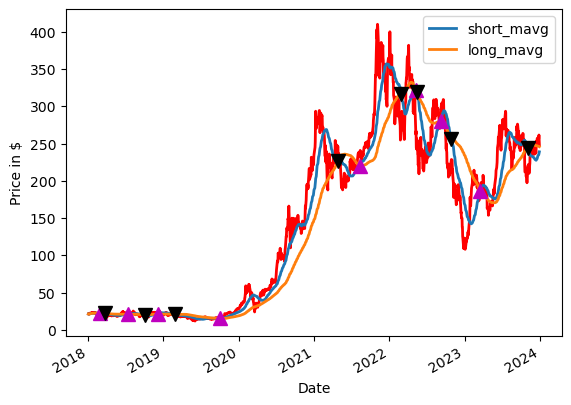

In [37]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 确保你已经加载了aapl数据并生成了signals DataFrame

# 计算每日回报率
signals['daily_returns'] = aapl['Close'].pct_change()

# 计算策略回报率
signals['strategy_returns'] = signals['daily_returns'] * signals['positions'].shift(1)

# 计算累积回报率
signals['cumulative_returns'] = (1 + signals['strategy_returns']).cumprod()

# 计算年化回报率
trading_days = 252
annualized_return = signals['strategy_returns'].mean() * trading_days

# 计算年化波动率
annualized_volatility = signals['strategy_returns'].std() * np.sqrt(trading_days)

# 假设无风险利率（年化）
risk_free_rate = 0.02

# 计算夏普系数
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# 输出结果
print(f"年化回报率: {annualized_return:.2f}")
print(f"年化波动率: {annualized_volatility:.2f}")
print(f"夏普系数: {sharpe_ratio:.2f}")


年化回报率: 0.01
年化波动率: 0.05
夏普系数: -0.20
